In [ ]:
import pandas as pd
import numpy as np
np.random.seed(10)

df = pd.DataFrame({
    'x': np.arange(0,20),
    'y': np.arange(0,20) + np.random.randint(0, 4, 20) #ax+b
})
df

,x,y
0,0,1
1,1,2
2,2,2
3,3,6
4,4,4
5,5,6
6,6,9
7,7,7
8,8,9
9,9,10


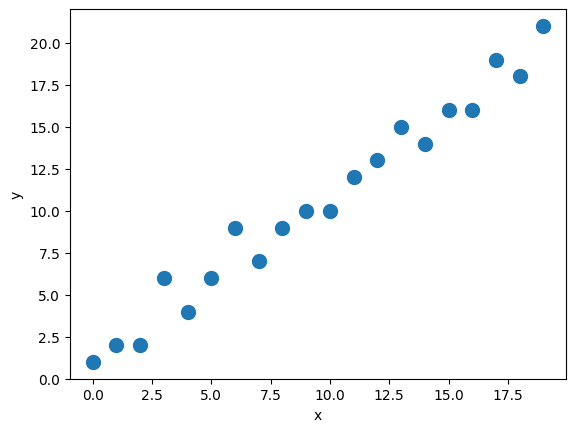

In [ ]:
df.plot(kind='scatter', x='x', y='y', s=100);

In [ ]:
from sklearn.svm import SVR
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [ ]:
modelo = SVR(kernel='linear')
modelo

SVR(kernel='linear')

In [ ]:
atributos = df['x'].to_frame()
rotulo = df['y'].to_frame()

In [ ]:
modelo.fit(atributos, rotulo) #treinamento

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
dir(modelo)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_vali

In [ ]:
modelo.coef_, modelo.intercept_

(array([[1.]]), array([0.9]))

In [ ]:
modelo.n_support_, modelo.support_

(array([16], dtype=int32),
 array([ 0,  1,  2,  3,  4,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19],
       dtype=int32))

''

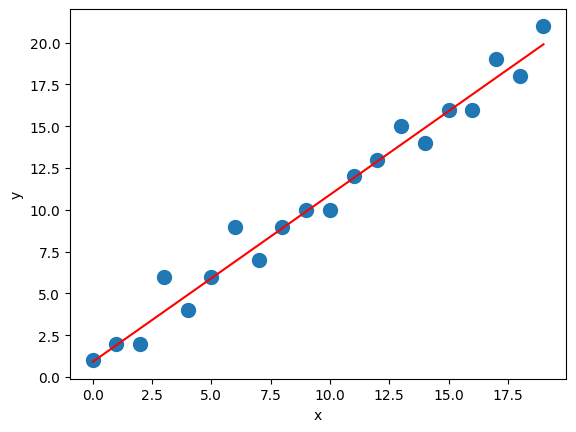

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='x', y='y', s=100)
plt.plot(atributos, modelo.predict(atributos), c='red')
;

In [ ]:
df['predicoes'] = modelo.predict(atributos)
df['support'] = 0
df

,x,y,predicoes,support
0,0,1,0.9,0
1,1,2,1.9,0
2,2,2,2.9,0
3,3,6,3.9,0
4,4,4,4.9,0
5,5,6,5.9,0
6,6,9,6.9,0
7,7,7,7.9,0
8,8,9,8.9,0
9,9,10,9.9,0


In [ ]:
df.iloc[modelo.support_, 3] = 1
df

,x,y,predicoes,support
0,0,1,0.9,1
1,1,2,1.9,1
2,2,2,2.9,1
3,3,6,3.9,1
4,4,4,4.9,1
5,5,6,5.9,0
6,6,9,6.9,1
7,7,7,7.9,1
8,8,9,8.9,0
9,9,10,9.9,0


''

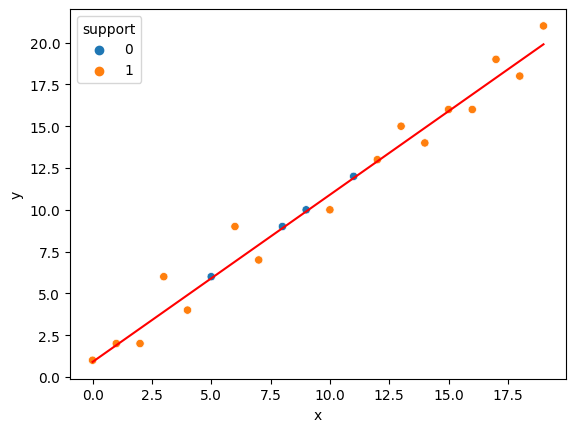

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='x', y='y', hue='support');
plt.plot(df['x'], df['predicoes'], c='red')
;

In [ ]:
modelo = SVR(kernel='poly', C=100)
modelo

SVR(C=100, kernel='poly')

In [ ]:
modelo.fit(atributos, rotulo)
df['predicoes'] = modelo.predict(atributos)
df['support'] = 0
df.iloc[modelo.support_, 3] = 1
df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,x,y,predicoes,support
0,0,1,6.214727,1
1,1,2,6.217309,1
2,2,2,6.235383,1
3,3,6,6.284441,1
4,4,4,6.379974,1
5,5,6,6.537475,1
6,6,9,6.772436,1
7,7,7,7.100348,1
8,8,9,7.536703,1
9,9,10,8.096993,1


''

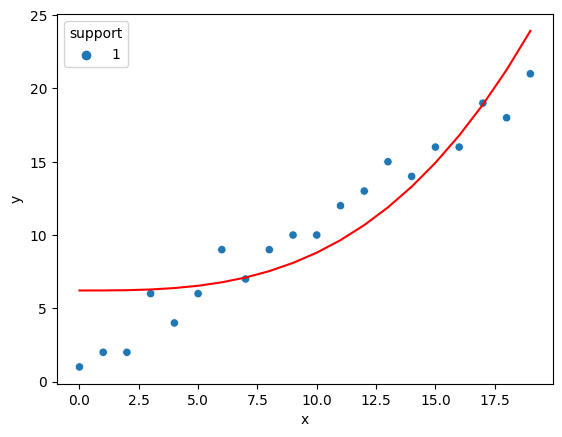

In [ ]:
sns.scatterplot(data=df, x='x', y='y', hue='support');
plt.plot(df['x'], df['predicoes'], c='red')
;

# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(10)

df = pd.DataFrame({
    'x': np.arange(0,20),
    'y': np.arange(0,20) + np.random.randint(0, 4, 20)
})
df

,x,y
0,0,1
1,1,2
2,2,2
3,3,6
4,4,4
5,5,6
6,6,9
7,7,7
8,8,9
9,9,10


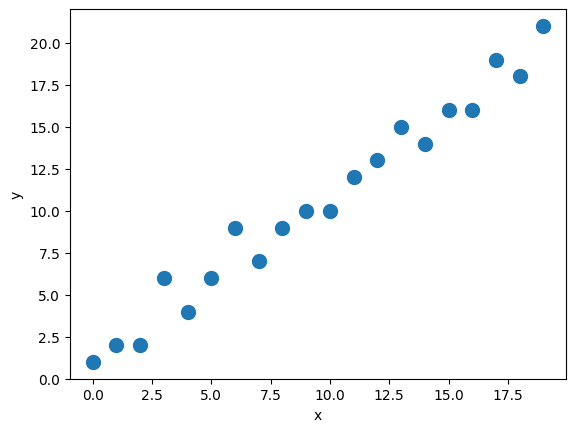

In [ ]:
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
);

In [ ]:
from sklearn.tree import DecisionTreeRegressor
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [ ]:
modelo = DecisionTreeRegressor(random_state=10)
modelo

DecisionTreeRegressor(random_state=10)

In [ ]:
atributos = df['x'].to_frame()
rotulo = df['y'].to_frame()

In [ ]:
modelo.fit(atributos, rotulo) #treinamento

DecisionTreeRegressor(random_state=10)

In [ ]:
dir(modelo)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_

In [ ]:
df['predicao'] = modelo.predict(atributos)
df

,x,y,predicao
0,0,1,1.0
1,1,2,2.0
2,2,2,2.0
3,3,6,6.0
4,4,4,4.0
5,5,6,6.0
6,6,9,9.0
7,7,7,7.0
8,8,9,9.0
9,9,10,10.0


''

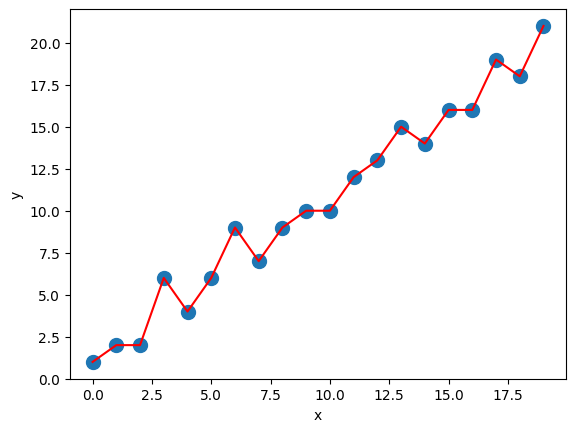

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;

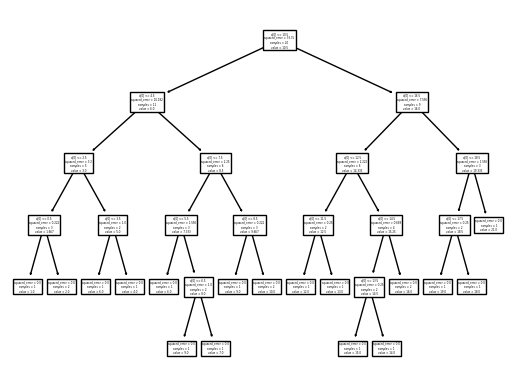

In [ ]:
from sklearn.tree import plot_tree
plot_tree(modelo);


In [ ]:
modelo = DecisionTreeRegressor(max_depth=3)
modelo

DecisionTreeRegressor(max_depth=3)

In [ ]:
modelo.fit(atributos, rotulo)
df['predicao'] = modelo.predict(atributos)
df

,x,y,predicao
0,0,1,1.666667
1,1,2,1.666667
2,2,2,1.666667
3,3,6,5.000000
4,4,4,5.000000
5,5,6,7.333333
6,6,9,7.333333
7,7,7,7.333333
8,8,9,9.666667
9,9,10,9.666667


''

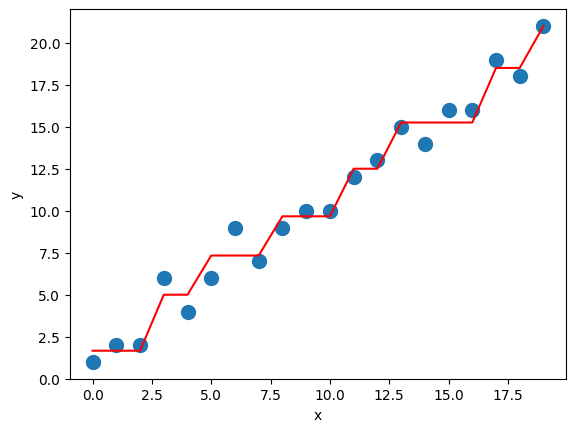

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;

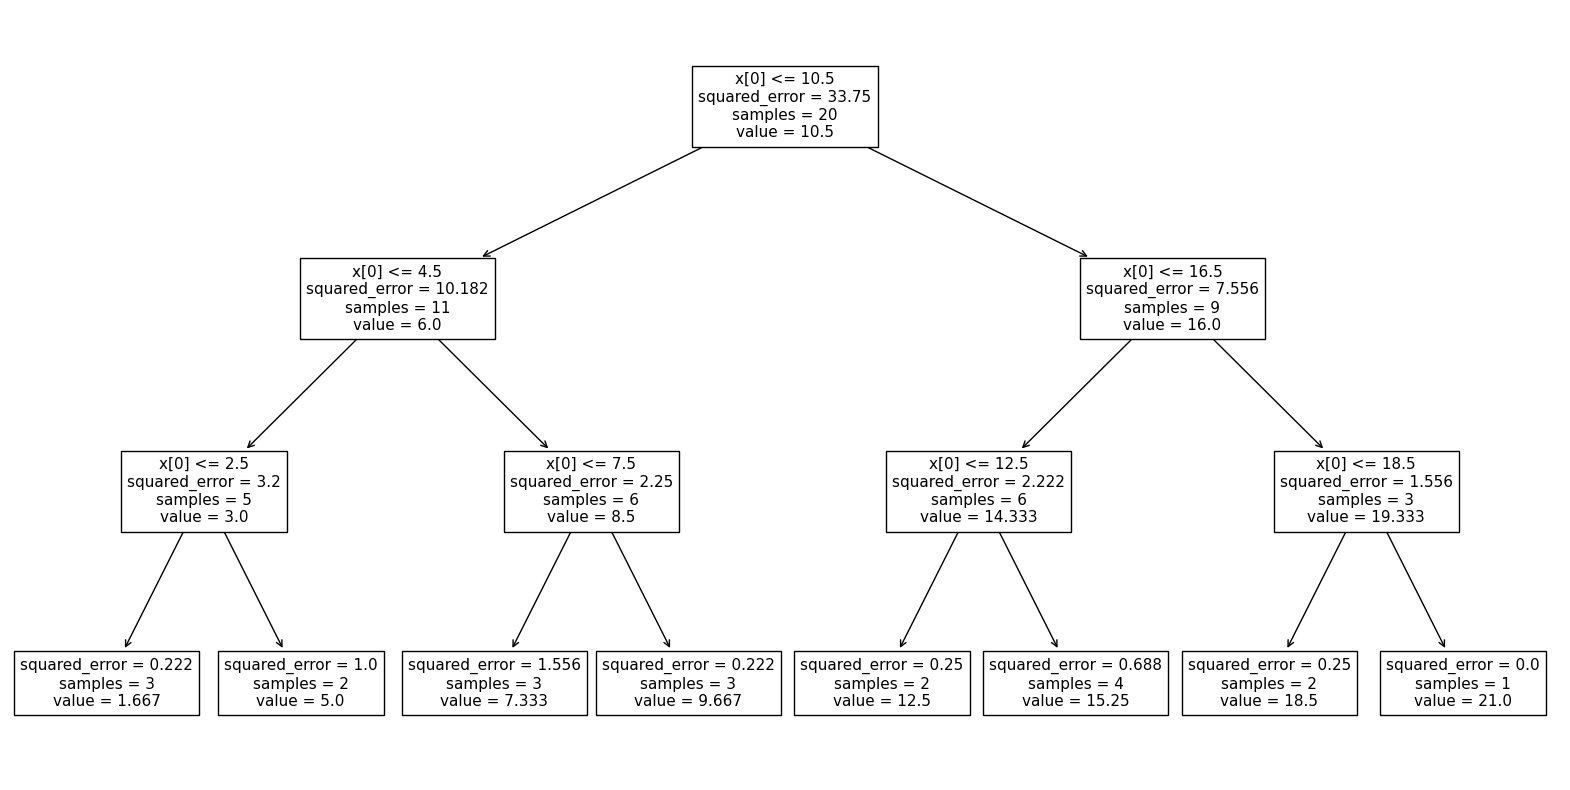

In [ ]:
plt.figure(figsize=[20,10])
plot_tree(modelo);

In [ ]:
modelo = DecisionTreeRegressor(min_samples_leaf=2)
modelo

DecisionTreeRegressor(min_samples_leaf=2)

In [ ]:
modelo.fit(atributos, rotulo)
df['predicao'] = modelo.predict(atributos)
df

,x,y,predicao
0,0,1,1.666667
1,1,2,1.666667
2,2,2,1.666667
3,3,6,5.000000
4,4,4,5.000000
5,5,6,7.333333
6,6,9,7.333333
7,7,7,7.333333
8,8,9,9.666667
9,9,10,9.666667


''

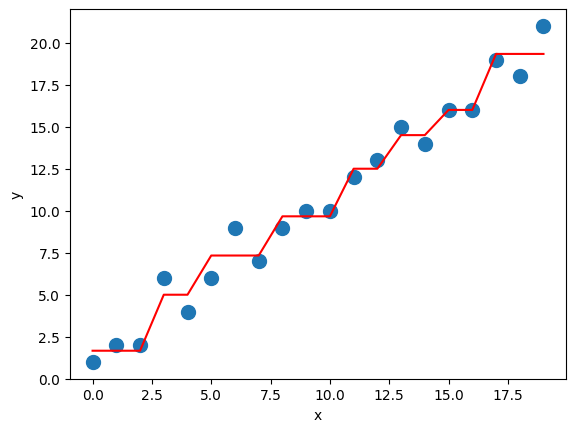

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;

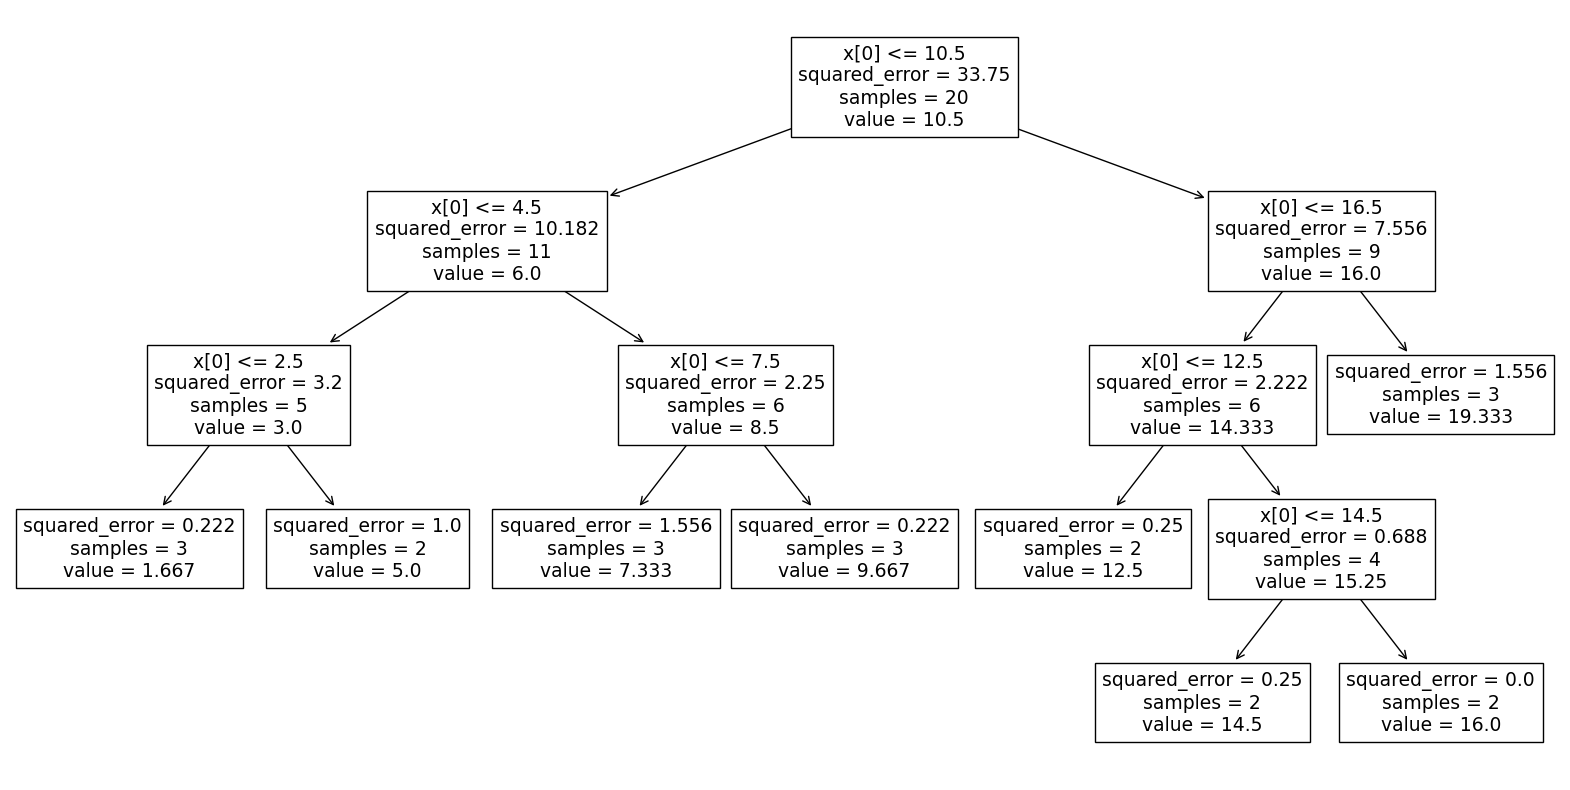

In [ ]:
plt.figure(figsize=[20,10])
plot_tree(modelo);

In [ ]:
np.arange(0, 51, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [ ]:
pd.DataFrame({
    'x': np.arange(0, 51, 5),
    'y': [0,0,0, 100, 100, 100, 50,50,50, 0, 0]
})
df

,x,y,predicao
0,0,1,1.666667
1,1,2,1.666667
2,2,2,1.666667
3,3,6,5.000000
4,4,4,5.000000
5,5,6,7.333333
6,6,9,7.333333
7,7,7,7.333333
8,8,9,9.666667
9,9,10,9.666667


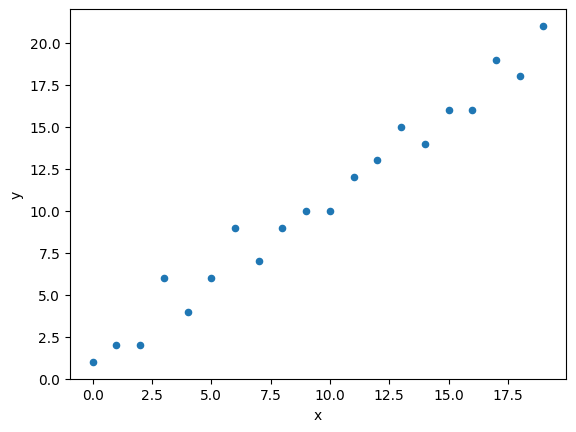

In [ ]:
df.plot(kind='scatter', x='x', y='y');

In [ ]:
modelo = DecisionTreeRegressor()
modelo

DecisionTreeRegressor()

In [ ]:
atributos = df['x'].to_frame

# Random Forest

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(10)

df = pd.DataFrame({
    'x': np.arange(0,20),
    'y': np.arange(0,20) + np.random.randint(0, 4, 20)
})
df

,x,y
0,0,1
1,1,2
2,2,2
3,3,6
4,4,4
5,5,6
6,6,9
7,7,7
8,8,9
9,9,10


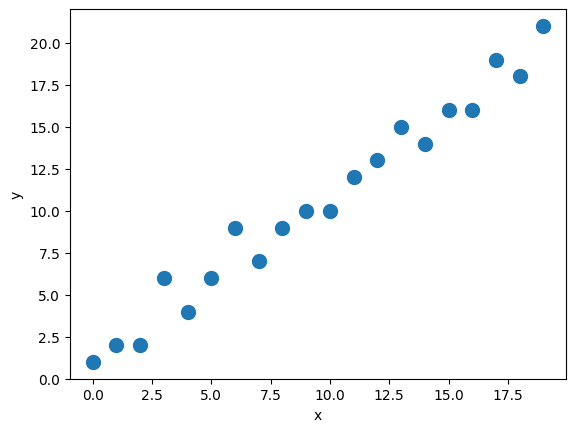

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
);

In [ ]:
from sklearn.ensemble import RandomForestRegressor
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [ ]:
modelo = RandomForestRegressor()
modelo

RandomForestRegressor()

In [ ]:
atributos = df['x'].to_frame()
rotulo = df['y'].to_frame()

In [ ]:
modelo.fit(atributos, rotulo)
df['predicao'] = modelo.predict(atributos)
df

<ipython-input-146-0d48c46bcd80>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(atributos, rotulo)


,x,y,predicao
0,0,1,1.51
1,1,2,1.94
2,2,2,2.40
3,3,6,4.88
4,4,4,4.61
5,5,6,5.94
6,6,9,8.00
7,7,7,7.74
8,8,9,8.66
9,9,10,9.72


''

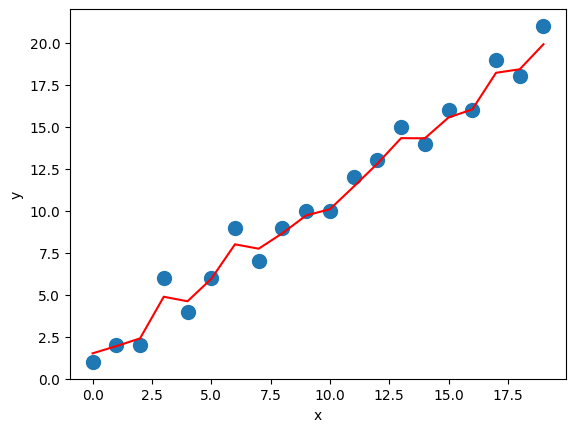

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;

In [ ]:
modelo = RandomForestRegressor(n_estimators=3, max_depth= 4)
modelo

RandomForestRegressor(max_depth=4, n_estimators=3)

In [ ]:
modelo.fit(atributos, rotulo)
df['predicao'] = modelo.predict(atributos)
df

<ipython-input-149-0d48c46bcd80>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(atributos, rotulo)


,x,y,predicao
0,0,1,1.333333
1,1,2,2.000000
2,2,2,2.000000
3,3,6,5.333333
4,4,4,5.000000
5,5,6,5.666667
6,6,9,7.555556
7,7,7,8.055556
8,8,9,8.500000
9,9,10,9.166667


''

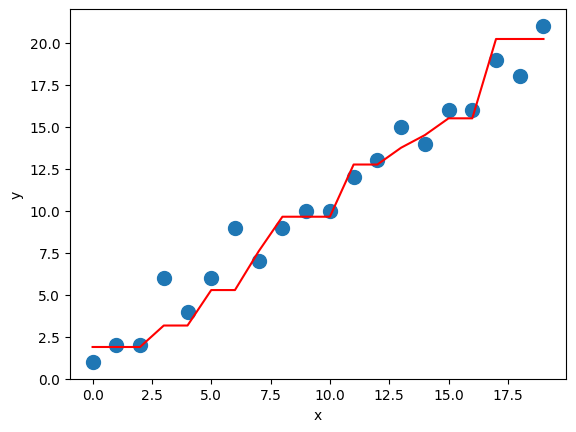

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;

In [ ]:
arvores = modelo.estimators_
arvores

[DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=418208057),
 DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=1705808619),
 DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=1730149217)]

In [ ]:
arvores[0]

DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=418208057)

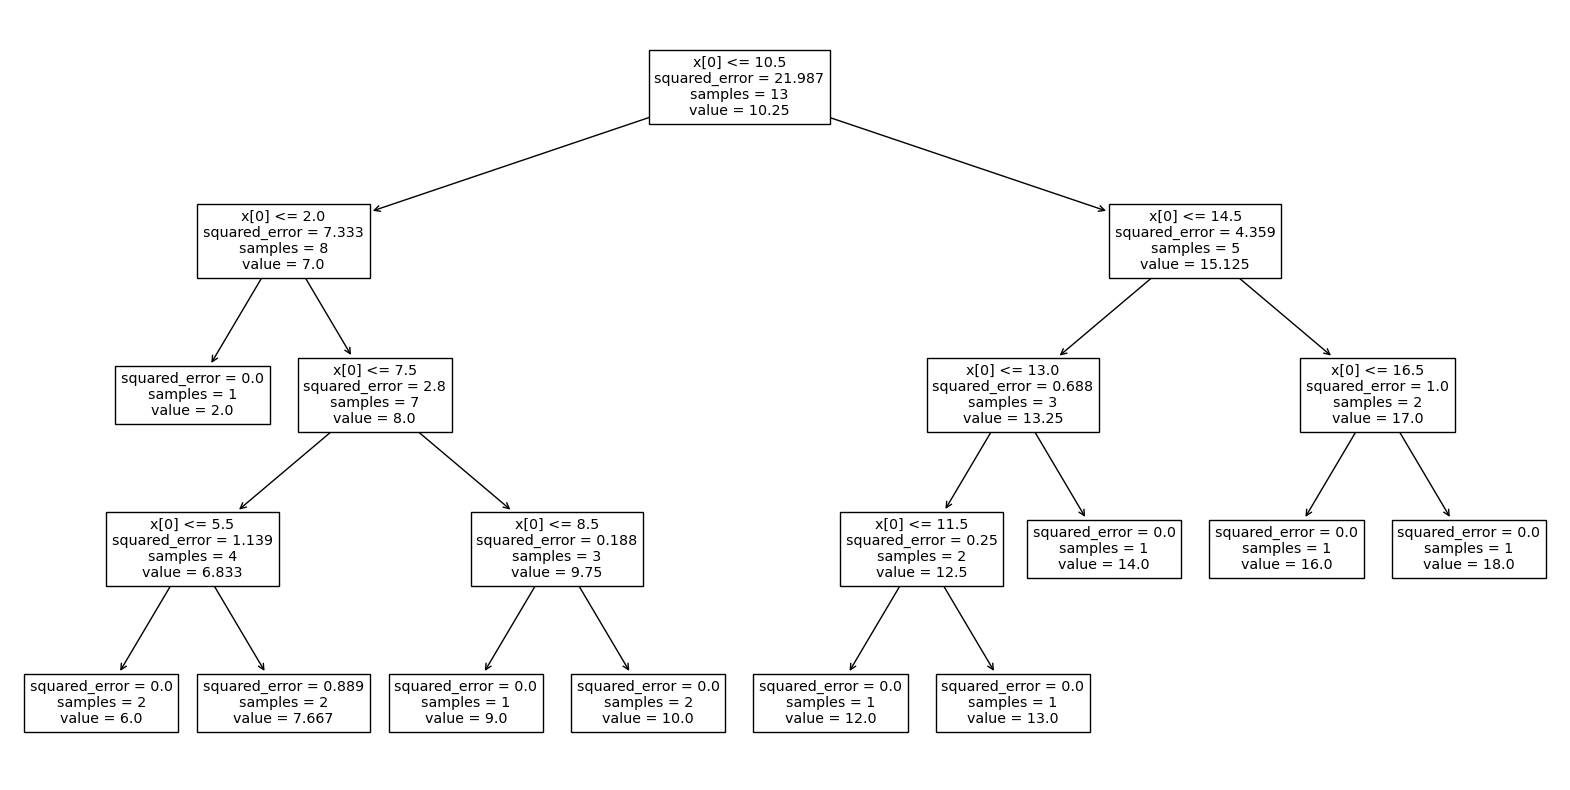

In [ ]:
plt.figure(figsize=[20,10])
plot_tree(arvores[0]);

In [ ]:
arvores[2]

DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=1730149217)

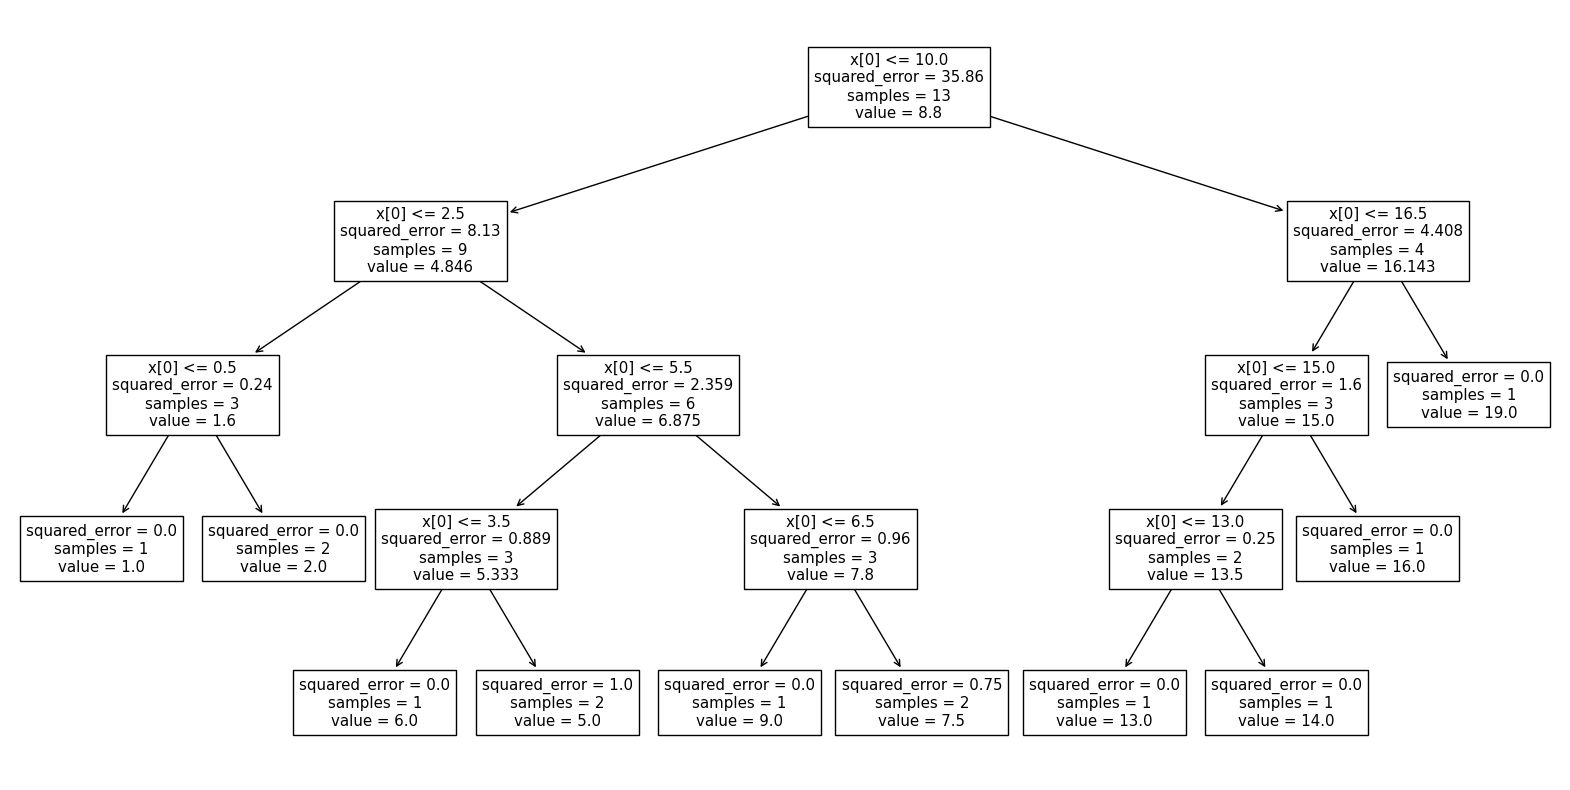

In [ ]:
plt.figure(figsize=[20,10])
plot_tree(arvores[2]);

In [ ]:
modelo = RandomForestRegressor(n_estimators=3, min_samples_leaf= 1)
modelo

RandomForestRegressor(n_estimators=3)

In [ ]:
modelo.fit(atributos, rotulo)
df['predicao'] = modelo.predict(atributos)
df

<ipython-input-166-0d48c46bcd80>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(atributos, rotulo)


,x,y,predicao
0,0,1,1.000000
1,1,2,1.333333
2,2,2,1.666667
3,3,6,2.666667
4,4,4,4.666667
5,5,6,5.333333
6,6,9,9.000000
7,7,7,8.333333
8,8,9,9.666667
9,9,10,10.000000


''

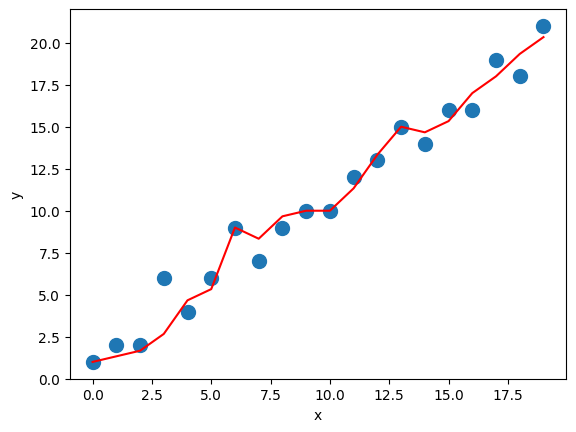

In [ ]:
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['predicao'], c='red')
;